# Pymaceuticals Inc.
---

### Analysis


- After removing duplicates, the dataset consists of a total of 248 unique mice. However, it's important to note that the original dataset had a total of 249 mice. The discrepancy in the count may be due to the removal of one duplicate mouse entry during the data cleaning process. The distribution of mice by gender reveals that there are 124 female mice and 125 male mice.

- Based on the box plots of the final tumor volumes, Capomulin shows comparable effectiveness to Ramicane, but it is significantly more effective than Infubinol and Ceftamine. This suggests that Capomulin and Ramicane are the most promising treatments among the selected drugs.

- The scatter plot depicting the relationship between mouse weight and average tumor volume supports the conclusion that the effectiveness of the drug decreases as the mouse weight increases. This conclusion is reliable due to the strong correlation observed (r-value of 0.95) from the linear regression analysis. The higher the mouse weight, the less effective the drug appears to be in reducing tumor volume.

- The study results demonstrate a high level of consistency, indicating their reliability. There is only one outlier observed in the dataset for the top drugs, and no outliers for Capomulin. This consistency strengthens the validity of the findings.




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_total = total_data["Mouse ID"].nunique()
mouse_total

249

## Remove Duplicate

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mouse = total_data.loc[total_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_df = total_data.loc[total_data["Mouse ID"] == "g989", :]
dup_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = total_data[total_data['Mouse ID'].isin(dup_mouse)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_total_clean = clean_df["Mouse ID"].nunique()
mouse_total_clean

248

## Summary Statistics

In [15]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Create a DataFrame to store the summary statistics
summary_stat = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": var,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err.": sem
})

# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
summary_stat_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the summary statistics table
summary_stat_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

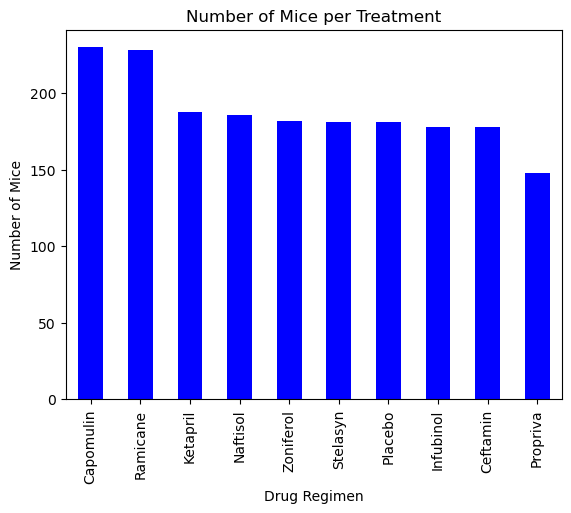

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()

# Create a Pandas bar plot
plot_pandas = mice_count.plot(kind='bar', color='b')

# Set the xlabel, ylabel, and title
plot_pandas.set_xlabel("Drug Regimen")
plot_pandas.set_ylabel("Number of Mice")
plot_pandas.set_title("Number of Mice per Treatment")

# Display the plot
plt.show()


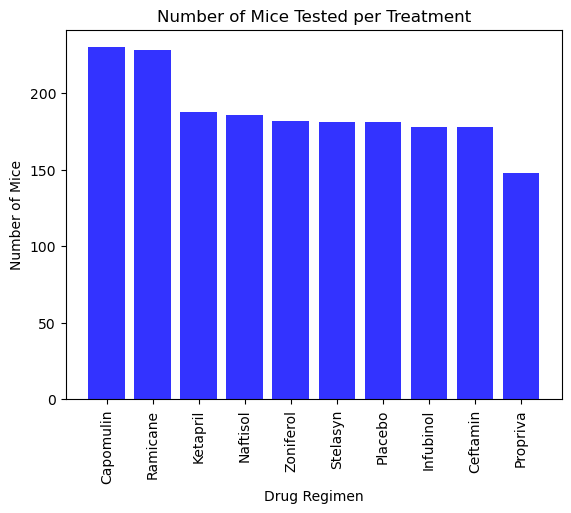

In [18]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel, ylabel, and title
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

# Display the plot
plt.show()


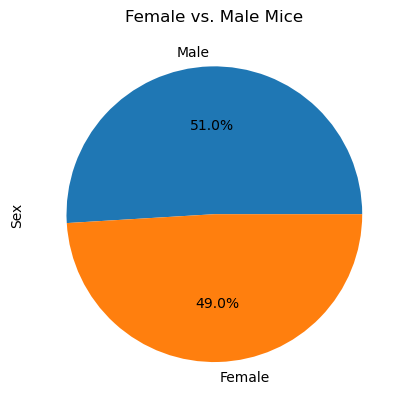

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = clean_df["Sex"].value_counts()

plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct="%1.1f%%")

plt.show()


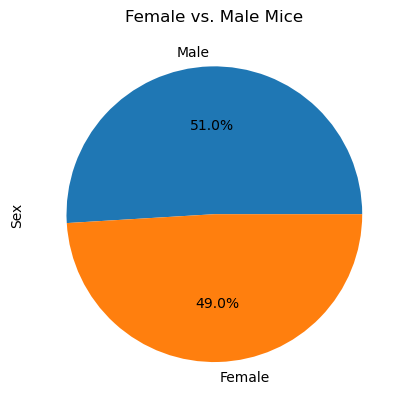

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = clean_df["Sex"].value_counts()
labels = gender_data.index.values
values = gender_data.values

plt.title("Female vs. Male Mice")
plt.pie(values, labels=labels, autopct="%1.1f%%")

plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots


In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = clean_df[clean_df["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [60]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)


Capomulin
Ramicane
Infubinol
Ceftamin


In [64]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []

# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# Add subset
# Determine outliers using upper and lower bounds

for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25, .5, .75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq - lowerq, 2)
    lower_bound = round(lowerq - (1.5 * iqr), 2)
    upper_bound = round(upperq + (1.5 * iqr), 2)

    print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")

    treatment.append(drug)  # Add the drug to the treatment list



------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 

In [65]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in reduced_last_tp["Drug Regimen"]:
    if drug not in treatment:
        treatment.append(drug)
        
# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []
upperq_list = []
lowerq_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    quartiles = new_df[drug].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    drug_iqr = upperq - lowerq
    
    # List containing upper and lower quartiles of drug final tumor volume
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    
    print(f"{drug}'s potential outliers': {drug_iqr}")
    
# Locate the rows which contain mice on each drug and get the tumor volumes

# Add subset

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5 * drug_iqr)
upper_bound = upperq + (1.5 * drug_iqr)


Capomulin's potential outliers': 7.781863460000004
Ceftamin's potential outliers': 15.577752179999997
Infubinol's potential outliers': 11.477135160000003
Ramicane's potential outliers': 9.098536719999998


Text(0.5, 0, '')

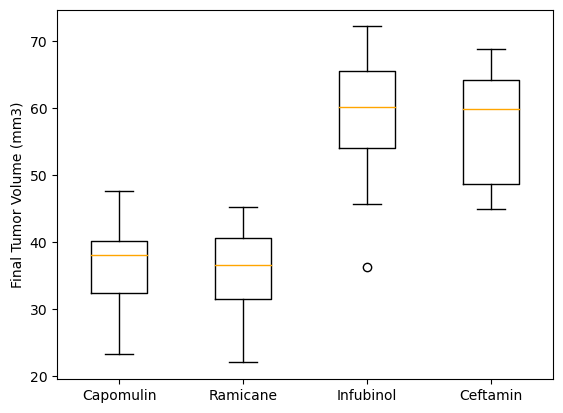

In [71]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot = new_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='orange'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

## Line and Scatter Plots

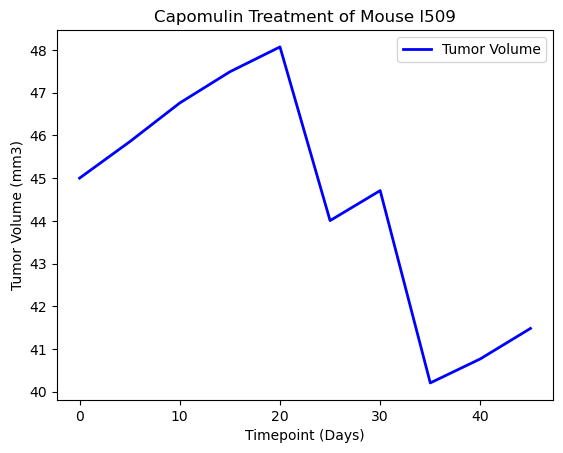

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = "l509"  # Specify the mouse ID

mouse_data = Capomulin_df.loc[Capomulin_df["Mouse ID"] == mouse_id]

x_axis = mouse_data["Timepoint"]
tumor_volume = mouse_data["Tumor Volume (mm3)"]

fig, ax = plt.subplots()
plt.title(f"Capomulin Treatment of Mouse {mouse_id}")
plt.plot(x_axis, tumor_volume, linewidth=2, markersize=15, color="b", label="Tumor Volume")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')

plt.show()


C:\Users\Yufan Zhou\AppData\Local\Temp\ipykernel_11660\610051480.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_capomulin_vol = Capomulin_df.groupby('Mouse ID')['Weight (g)', 'Tumor Volume (mm3)'].mean()


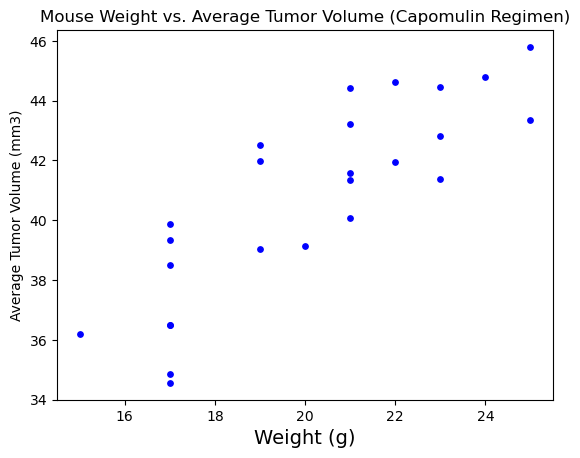

In [76]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig, ax = plt.subplots()
avg_capomulin_vol = Capomulin_df.groupby('Mouse ID')['Weight (g)', 'Tumor Volume (mm3)'].mean()

marker_size = 15
plt.scatter(avg_capomulin_vol['Weight (g)'], avg_capomulin_vol['Tumor Volume (mm3)'], color='blue', s=marker_size)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()



## Correlation and Regression

Correlation Coefficient: 0.841936342469472
Linear Regression Equation: y = 0.95x + 21.55


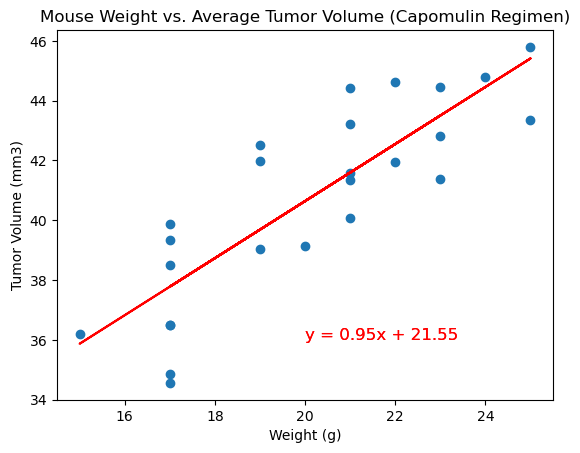

In [83]:
# Extract mouse weight and average tumor volume data
weight = avg_capomulin_vol['Weight (g)']
tumor_volume = avg_capomulin_vol['Tumor Volume (mm3)']

# Calculate correlation coefficient
correlation = st.pearsonr(weight, tumor_volume)[0]
print(f"Correlation Coefficient: {correlation}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(weight, tumor_volume)

# Create the regression line equation
regression_line = f"y = {slope:.2f}x + {intercept:.2f}"
print("Linear Regression Equation:", regression_line)

x_values = weight
y_values = tumor_volume

# Plot scatter plot and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, slope * x_values + intercept, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.annotate(regression_line, (20, 36), fontsize=12, color="red")
plt.text(20, 36, regression_line, fontsize=12, color="red")
plt.show()
